In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data=pd.read_excel('/home/manikanta/Downloads/archive (6)/Data_Train.xlsx')
test_data=pd.read_excel('/home/manikanta/Downloads/archive (6)/Test_set.xlsx')

In [4]:
train_data.shape

(10683, 11)

In [5]:
test_data.shape

(2671, 10)

In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
test_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [8]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [10]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [14]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [15]:
test_data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [16]:
train_data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [17]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [19]:
print(train_data.shape)
print(test_data.shape)

(10682, 11)
(2671, 10)


In [20]:
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data["Journey_day"]=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [21]:
train_data["Journey_Month"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month
test_data["Journey_Month"]=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [22]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [23]:
test_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6


In [24]:
train_data['Dep_Hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_Mins']=pd.to_datetime(train_data['Dep_Time']).dt.minute
test_data['Dep_Hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_Mins']=pd.to_datetime(test_data['Dep_Time']).dt.minute

In [25]:
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [26]:
train_data.drop('Dep_Time',axis=1,inplace=True)
test_data.drop('Dep_Time',axis=1,inplace=True)

In [27]:
train_data.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Hour,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [28]:
train_data['Arrival_Hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
test_data['Arrival_Hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour

In [29]:
train_data['Arrival_minutes']=pd.to_datetime(train_data['Arrival_Time']).dt.minute   
test_data['Arrival_minutes']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [30]:
train_data.drop('Arrival_Time',axis=1,inplace=True)
test_data.drop('Arrival_Time',axis=1,inplace=True)

In [31]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [32]:
duration_test=list(test_data['Duration'])
for i in range(len(duration_test)):
    if len(duration_test[i].split()) !=2:
        if "h" in duration_test[i]:
            duration_test[i]=duration_test[i].strip()+" 0m"
        else:
            duration_test[i]="0h "+duration_test[i]
            
duration_hourst=[]
duration_minst=[]
for i in range(len(duration_test)):
    duration_hourst.append(int(duration_test[i].split(sep="h")[0]))
    duration_minst.append(int(duration_test[i].split(sep="m")[0].split()[-1]))

In [33]:
train_data['Duration_hours']=duration_hours
train_data['Duration_mins']=duration_mins
test_data['Duration_hours']=duration_hourst
test_data['Duration_mins']=duration_minst

In [34]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [35]:
test_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55


In [36]:
train_data.drop("Duration",axis=1,inplace=True)
test_data.drop("Duration",axis=1,inplace=True)

In [37]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

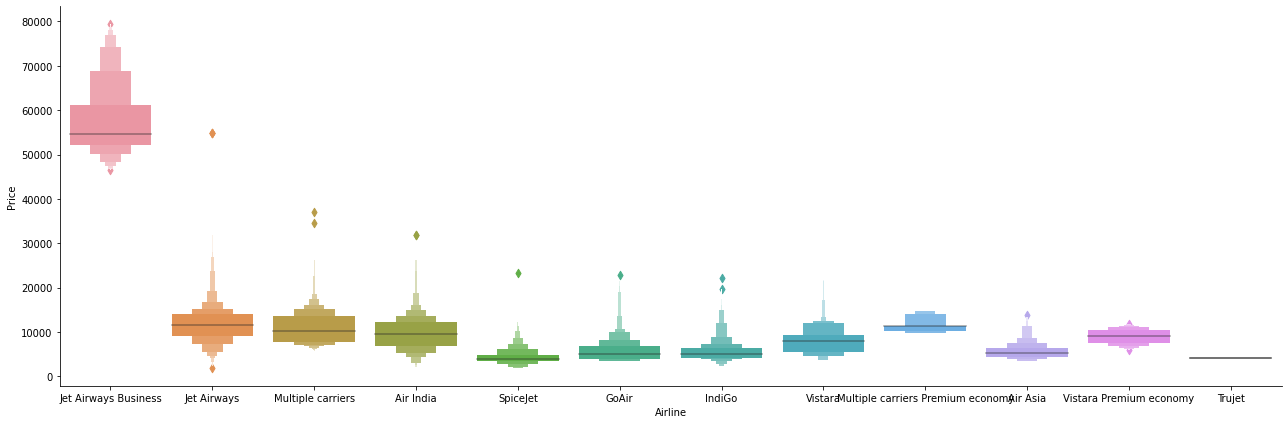

In [38]:
sns.catplot(y='Price',x='Airline',data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [39]:
Airline=train_data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [40]:
Airline_test=test_data[['Airline']]
Airline_test=pd.get_dummies(Airline_test,drop_first=True)
Airline_test.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0


In [41]:
train_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

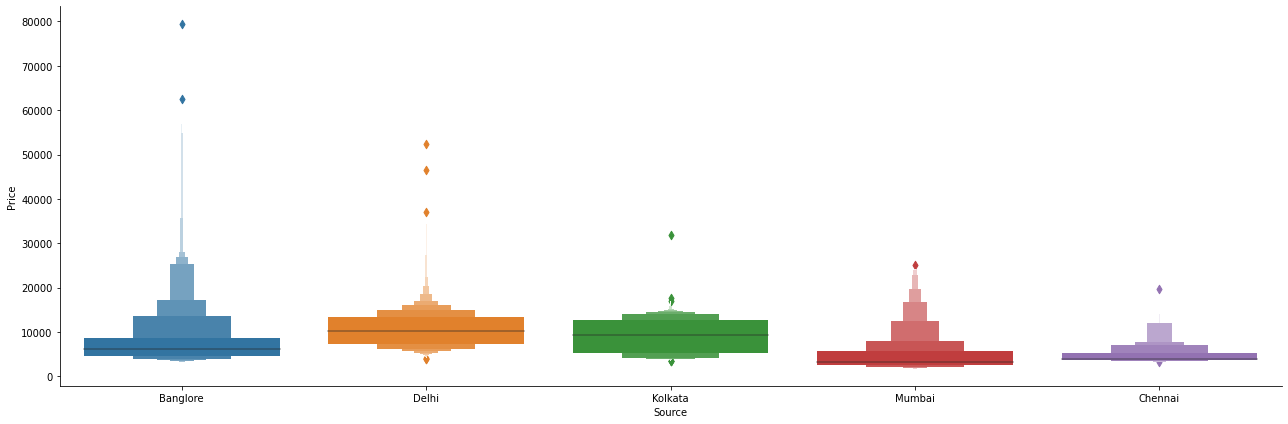

In [42]:
sns.catplot(y="Price",x="Source",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [43]:
Source=pd.get_dummies(train_data.Source,drop_first=True)
Source.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0


In [44]:
Source_test=pd.get_dummies(test_data.Source,drop_first=True)
Source_test.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0


In [45]:
dest=pd.get_dummies(train_data[['Destination']],drop_first=True)
dest.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [46]:
dest_test=pd.get_dummies(test_data[['Destination']],drop_first=True)
dest_test.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0


In [47]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [48]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [49]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [50]:
test_data.head(2)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0


In [51]:
train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
test_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [52]:
final_train=pd.concat([train_data,Airline,Source,dest],axis=1)
final_test=pd.concat([test_data,Airline_test,Source_test,dest_test],axis=1)

In [53]:
final_train.head()

,Total_Stops,Price,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [54]:
final_test.tail()

,Total_Stops,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
2666,1,6,6,20,30,20,25,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,...,0,0,1,0,0,1,0,0,0,0
2670,1,15,6,4,55,19,15,14,20,0,...,0,0,1,0,0,1,0,0,0,0


In [55]:
pd.set_option('display.max_columns',None)

In [56]:
final_train.shape,final_test.shape

((10682, 30), (2671, 28))

In [57]:
final_test['Airline_Trujet']=0

In [58]:
final_test.shape

(2671, 29)

In [59]:
final_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_Month', 'Dep_Hour',
       'Dep_Mins', 'Arrival_Hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [60]:
X=final_train.loc[:,['Total_Stops',  'Journey_day', 'Journey_Month', 'Dep_Hour',
       'Dep_Mins', 'Arrival_Hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [61]:
y=final_train.iloc[:,1]

In [62]:
from sklearn.ensemble import ExtraTreesRegressor
sel=ExtraTreesRegressor()
sel.fit(X,y)

ExtraTreesRegressor()

In [63]:
print(sel.feature_importances_)

[2.22386575e-01 1.42977422e-01 5.40386656e-02 2.40592567e-02
 2.09954213e-02 2.89597961e-02 1.92105312e-02 1.27681921e-01
 1.88296841e-02 9.66429211e-03 1.91053292e-03 1.63812620e-02
 1.38769855e-01 6.72128881e-02 1.90295434e-02 8.97662884e-04
 2.94513924e-03 1.00197460e-04 5.14628021e-03 8.76216338e-05
 4.67760897e-04 1.13079915e-02 3.09979419e-03 6.13992055e-03
 7.71572853e-03 1.64809154e-02 8.20629756e-03 4.74000936e-04
 2.48230432e-02]


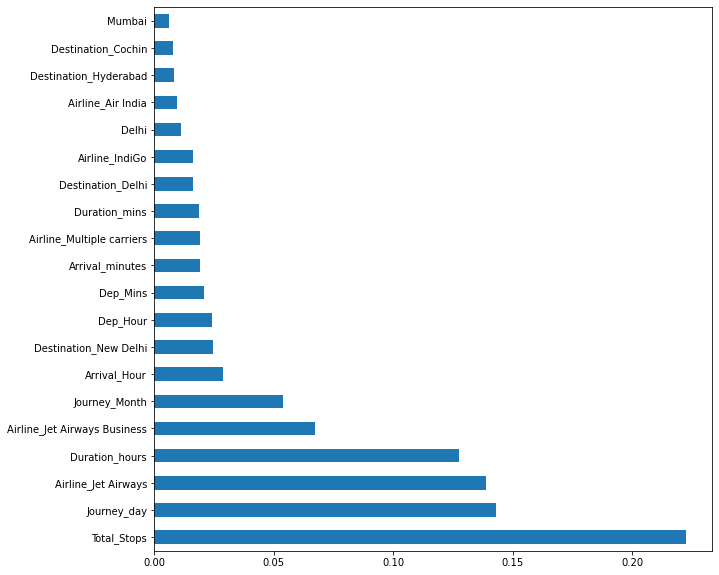

In [64]:
plt.figure(figsize=(10,10))
feat_importances=pd.Series(sel.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [66]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.9524572749848372

In [67]:
y_pred=reg.predict(X_test)
y_pred

array([12629.02133333,  5902.14      ,  3556.086     , ...,
       10979.95      ,  8829.83      , 12721.576     ])

In [68]:
from sklearn.metrics import r2_score
rsquare=r2_score(y_test,y_pred)

In [69]:
rsquare

0.7972937582840129

In [70]:
predictions=reg.predict(final_test)

In [71]:
predictions

array([13769.97066667,  4567.18      , 15587.88166667, ...,
       16505.414     , 14795.57      ,  7412.35      ])

In [73]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_excel('Test_set.xlsx')